In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lyricsgenius

In [4]:
chance_df = pd.read_csv('/Users/avacheevers/Desktop/music_input_data.csv')

In [5]:
#reading lyrics from Genius API using lyricsgenius package
genius = lyricsgenius.Genius('dPXmLgq8d3yoBnZIwmjzlYqSwZLgR7B93OdWGsph8r7-za2kj6tpcvl8EayuDqWE')

song_dict = {}

error_count = 0

for item in chance_df['Song']:
    try:
        song = genius.search_song(item, 'Chance the Rapper')
        song_dict[item] = song.lyrics.lower()
    except:
        print('Error occured with', song)
        error_count += 1
        song_dict[item] = ' '

print(error_count, 'errors occured.')
        

Searching for "14,400 Minutes" by Chance the Rapper...
Done.
Searching for "Nostalgia" by Chance the Rapper...
Done.
Searching for "Missing You" by Chance the Rapper...
Done.
Searching for "Windows" by Chance the Rapper...
Done.
Searching for "Brain Cells" by Chance the Rapper...
Done.
Searching for "Long Time" by Chance the Rapper...
Done.
Searching for "22 Offs" by Chance the Rapper...
Done.
Searching for "U Got Me Fucked Up" by Chance the Rapper...
Done.
Searching for "Family" by Chance the Rapper...
Done.
Searching for "Juke Juke" by Chance the Rapper...
Done.
Searching for "Fuck You Tahm Bout" by Chance the Rapper...
Done.
Searching for "Long Time II" by Chance the Rapper...
Done.
Searching for "Prom Night" by Chance the Rapper...
Done.
Searching for "Hey Ma" by Chance the Rapper...
Done.
Searching for "Good Ass Intro" by Chance the Rapper...
Done.
Searching for "Pusha Man" by Chance the Rapper...
Done.
Searching for "Paranoia" by Chance the Rapper...
Done.
Searching for "Cocoa Bu

In [6]:
#counts total occurances of any word in an inputted list of words
def word_counter_by_song(words_to_search_for):
    
    word_count_dict = {}
    
    for key in song_dict:
        matches_total = 0
        
        for word in words_to_search_for:
            matches_per_song = song_dict[key].count(word)
            matches_total += matches_per_song
        word_count_dict[key] = matches_total
        
    return word_count_dict

In [7]:
#i apologize for writing out these words!
swear_dict = word_counter_by_song(['fuck','shit','bitch','pussy','dick','cock','fag','hoe'])

In [8]:
#mapping swear count onto df
chance_df['Swear Count'] = chance_df['Song'].map(swear_dict)

In [9]:
#checking that df is as expected
chance_df

,Artist,Album,Year,Song,Swear Count
0,Chance the Rapper,10 Day,2012,"14,400 Minutes",3
1,Chance the Rapper,10 Day,2012,Nostalgia,0
2,Chance the Rapper,10 Day,2012,Missing You,8
3,Chance the Rapper,10 Day,2012,Windows,8
4,Chance the Rapper,10 Day,2012,Brain Cells,5
...,...,...,...,...,...
56,Chance the Rapper,The Big Day,2019,Slide Around,8
57,Chance the Rapper,The Big Day,2019,Sun Come Down,3
58,Chance the Rapper,The Big Day,2019,Found A Good One,1
59,Chance the Rapper,The Big Day,2019,Town On The Hill,0


Text(0.5, -0.1, '')

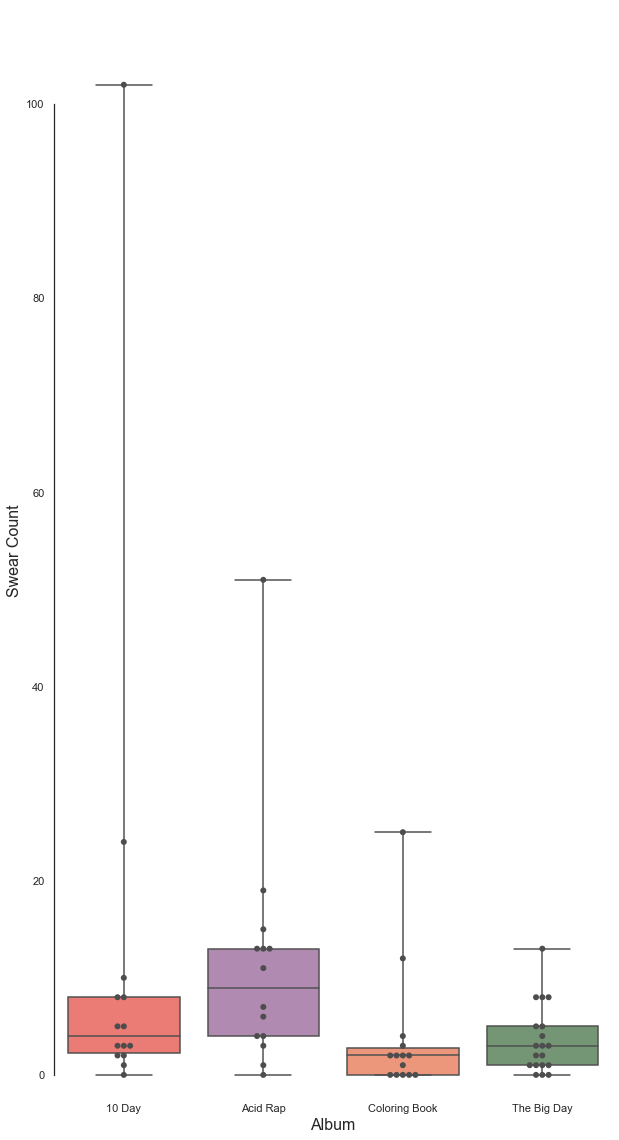

In [10]:
sns.set(style = 'white')
plt.rcParams["axes.labelsize"] = 16
f, ax = plt.subplots(figsize = (10,20))
ax.set(ylim = (-2,110))
chance_pal = {"10 Day": "#ff6961", "Acid Rap": "#b883b8", "Coloring Book":"#ff8c69", "The Big Day": "#6E9C6E"}
sns.boxplot(x = "Album", y = "Swear Count", data = chance_df, whis = 'range', palette = chance_pal)
sns.swarmplot(x = "Album", y = "Swear Count", data = chance_df, size = 6, color = "0.3", linewidth = 0)
sns.despine(trim = True, bottom = True)
ax.text(x=0.5, y= -0.1, s='', fontsize=16, ha='center', va='bottom', transform=ax.transAxes)


In [11]:
#creating a dictionary of every word and how many times it occured
all_words_dict = {}

for item in song_dict:
    
    for word in song_dict[item].split():
        word = word.replace(".","")
        word = word.replace("\n","")
        word = word.replace(",","")
        word = word.replace("[","")
        word = word.replace("]",",")
        word = word.replace("!","")
        word = word.replace("?","")
        word = word.replace("(","")
        word = word.replace(")","")
        
        if word not in all_words_dict:
            all_words_dict[word] = 1
        else:
            all_words_dict[word] += 1

In [12]:
#creating a series from all_words_dict
most_said_words = pd.Series(all_words_dict).sort_values(ascending = False)

In [13]:
#function to search for the total count of occurances of an inputted list of words
def word_counter_agg(words_to_search_for):
    agg_count = 0
    for word in words_to_search_for:
        agg_count += most_said_words[word]
    return agg_count

In [14]:
#family is an important theme in Chance's music
family_words = {}

family_words['dad'] = word_counter_agg(['dad','daddy','dads','father'])
family_words['mom'] = word_counter_agg(['mom','moms', 'mother', 'ma', 'mama'])
family_words['grandma'] = word_counter_agg(['grandma','granny', 'grandmas'])
family_words['daughter'] = word_counter_agg(['daughter', 'daughters'])
family_words['son'] = word_counter_agg(['son'])
family_words['wife'] = word_counter_agg(['wife', 'wifey', 'bride'])
family_words['husband'] = word_counter_agg(['husband', 'hubby'])
family_words['cousin'] = word_counter_agg(['cousin', 'cousins'])
family_words['uncle'] = word_counter_agg(['uncle'])
family_words['brother'] = word_counter_agg(['brother', 'brothers', 'bro', 'bros'])
family_words['family'] = word_counter_agg(['family', 'fam'])

family_series = pd.Series(family_words).sort_values(ascending = False)
family_series

In [16]:
#chicago is also an important theme that I also wanted to explore
chicago_words = {}

chicago_words['chicago'] = word_counter_agg(['chicago'])
chicago_words['chi'] = word_counter_agg(['chi'])
chicago_words['chi-town'] = word_counter_agg(['chi-town'])
chicago_words['chi-city'] = word_counter_agg(['chi-city'])
chicago_words['7-7-3'] = word_counter_agg(['7-7-3'])
chicago_words['79th'] = word_counter_agg(['79th'])

chicago_series = pd.Series(chicago_words).sort_values(ascending = False)
chicago_series

In [17]:
#Chance has a song called '22 Offs', where he actually says the word 'off' 25 times. I wanted to compare this to other songs
off_dict = word_counter_by_song(['off'])
chance_df['Off Count'] = chance_df['Song'].map(off_dict)

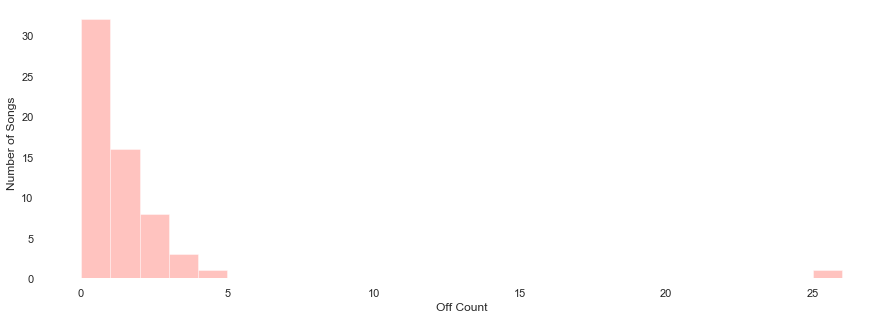

In [18]:
sns.set(style = "white")
f, ax = plt.subplots(figsize = (15, 5))
ax.set(ylabel = 'Number of Songs')
sns.distplot(chance_df['Off Count'], kde = False, color = "#ff6961", bins = np.arange(chance_df['Off Count'].min(), chance_df['Off Count'].max() + 1))
sns.despine(trim = True,  left = True, bottom = True)